<a href="https://colab.research.google.com/github/sakshamshil/Machine-Learning-Projects/blob/main/Movie%20Recommendation%20System/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Three types of Recommendation System :
1. Content Based Recommendation System
2. Popularity Based Recommendation System
3. Collaborative Based Recommendation System

We will implement Content Based Recommendation System and Popularity Based Recommendation System to an extent

**Work Flow**

Data -> Data Pre Processing -> Feature Extraction (changing textual data into feature vectors/numerical values)

then User Input a movie -> Find Similarity score (using **Cosine Similarity Algorithm**) -> List of Movies

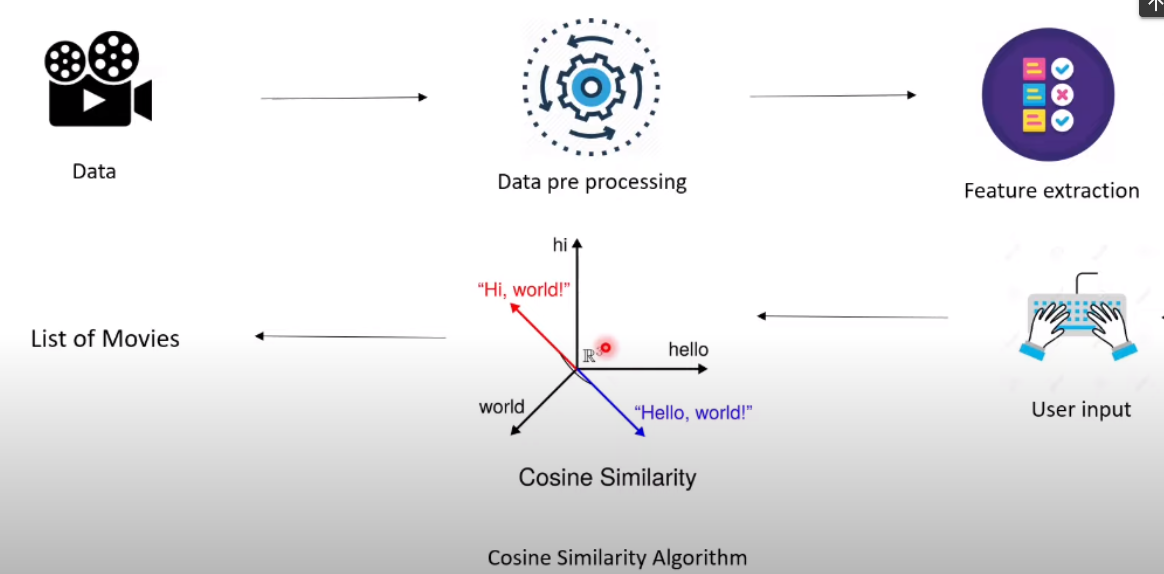

In [4]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
movies_data = pd.read_csv('/content/movies.csv')

In [6]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [7]:
movies_data.shape

(4803, 24)

In [8]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

###Feature Selection
**Chosing the Relevant Features for recommendation**

In [9]:
selected_features = ['genres', 'keywords', 'tagline', 'cast', 'director']


In [10]:
#Replacing the missing values with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [11]:
#Combining the selected features

movies_final = movies_data ['genres'] + ' ' + movies_data ['keywords'] + ' ' + movies_data ['tagline'] + ' ' +  movies_data ['cast'] + ' ' + movies_data ['director']

In [12]:
print(movies_final)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


##Feature Extraction
Converting text data to numerical values

In [13]:
feature_extractor = TfidfVectorizer()

In [14]:
feature_vectors = feature_extractor.fit_transform(movies_final)

In [15]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

##Cosine Similarity
Getting similarity scores using cosigne similarity

In [16]:
similarity = cosine_similarity(feature_vectors)

In [17]:
print(similarity)     #movie index, similarity score of each movie

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [18]:
similarity.shape

(4803, 4803)

####Getting the movie name from the user

In [19]:
movie_name = input('Enter your favourite movie name : ')

Enter your favourite movie name : Spiderman


In [20]:
#List of all movie names given in the dataset

all_movie_names = movies_data['title'].tolist()
print(all_movie_names)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [21]:
#Finding close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, all_movie_names)
print(find_close_match)

['Spider-Man', 'Superman', 'Spider']


In [22]:

close_match = find_close_match[0]
print(close_match)

Spider-Man


In [23]:
index_of_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_movie)

159


In [24]:
#Getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_movie]))
print(similarity_score)

[(0, 0.05803347266824191), (1, 0.028510860472594192), (2, 0.027527242422615502), (3, 0.006457320533567938), (4, 0.07910312941508459), (5, 0.3188331558421017), (6, 0.0), (7, 0.005837358717098843), (8, 0.01984856933034166), (9, 0.017094559158687336), (10, 0.03289500092097852), (11, 0.00513746235036844), (12, 0.017699463936031615), (13, 0.016312073634578168), (14, 0.017221598804829895), (15, 0.011028690492438575), (16, 0.0055350569108376544), (17, 0.016931592006051974), (18, 0.005525360643470355), (19, 0.021680168394872627), (20, 0.04593061379094501), (21, 0.004853496672605501), (22, 0.017356132823837148), (23, 0.028252755876041348), (24, 0.01268769144627989), (25, 0.011992878106901545), (26, 0.006024661849598387), (27, 0.005268179012698267), (28, 0.005783838859717594), (29, 0.028149881853568752), (30, 0.3179190198222972), (31, 0.03510954856669071), (32, 0.021374196216168765), (33, 0.005801089457404634), (34, 0.0), (35, 0.006089692551768507), (36, 0.005487298957648992), (37, 0.13254335177

in (0, 0.033570748780675445), (1, 0.0546448279236134) ....

first index represents the index of movie, and 2nd index represents the similarity score of that movie compared to the movie given by the user


In [25]:
len(similarity_score)

4803


(this list "similarity_score" contains the list of every movie's similarity score)

In [26]:
#Sorting the list based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(159, 1.0000000000000004), (5, 0.3188331558421017), (30, 0.3179190198222972), (1559, 0.1828131277152563), (382, 0.16501718739122473), (3575, 0.16167041055131565), (2361, 0.13913552967690979), (37, 0.13254335177245744), (1364, 0.1315753447298594), (1193, 0.1282353330125354), (1793, 0.12355727076460596), (328, 0.12188313538843792), (677, 0.11987005023906432), (1796, 0.11833294042448737), (1523, 0.11678331012908381), (1598, 0.114546607093097), (4441, 0.11278570204538363), (2529, 0.10580630139750406), (4427, 0.10339492817261244), (976, 0.10254994461653799), (2157, 0.10224484429143274), (978, 0.1010166095053646), (2369, 0.09964302137705913), (1435, 0.09844672492278542), (448, 0.09796336022022192), (1533, 0.09756374595438326), (2060, 0.09746246263620428), (2201, 0.09721199893417153), (2980, 0.09682299898140828), (2763, 0.09599045327407793), (3077, 0.09545910274922952), (3155, 0.09513620988808803), (3046, 0.09500017389530692), (2592, 0.09458996594241367), (1239, 0.09280098679642097), (3188, 

In [27]:
#Printing the name of similar movies based on index

print("Movies Suggested For You : \n")

i=1

for movie in sorted_similar_movies:
      index = movie[0]
      title_from_index = all_movie_names[index]
      if (i<=30):
        print(i, '. ', title_from_index)
        i+=1

Movies Suggested For You : 

1 .  Spider-Man
2 .  Spider-Man 3
3 .  Spider-Man 2
4 .  The Notebook
5 .  Seabiscuit
6 .  Clerks II
7 .  The Ice Storm
8 .  Oz: The Great and Powerful
9 .  Horrible Bosses
10 .  The Count of Monte Cristo
11 .  In Good Company
12 .  Finding Nemo
13 .  Clear and Present Danger
14 .  Brothers
15 .  The Good German
16 .  Drag Me to Hell
17 .  Bambi
18 .  The Queen
19 .  Charly
20 .  Escape from L.A.
21 .  Daybreakers
22 .  The Life Aquatic with Steve Zissou
23 .  Labor Day
24 .  Wimbledon
25 .  Cold Mountain
26 .  Hearts in Atlantis
27 .  Out of the Furnace
28 .  Bullets Over Broadway
29 .  The Purge: Election Year
30 .  Dick


#Movie Recommendation System

(Grouping all the relevant code in one block)

In [28]:
movie_name = input(' Enter your favourite movie name : ')

all_movie_names = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, all_movie_names)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = all_movie_names[index]
  if (i<=30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : Shawshank Redemption
Movies suggested for you : 

1 . The Shawshank Redemption
2 . Standard Operating Procedure
3 . Bound
4 . Do the Right Thing
5 . The Snow Queen
6 . The Longest Yard
7 . The Naked Gun 33⅓: The Final Insult
8 . Unleashed
9 . Hurricane Streets
10 . Flubber
11 . Antitrust
12 . 102 Dalmatians
13 . The Last Castle
14 . Arlington Road
15 . Dead Man Walking
16 . Along Came a Spider
17 . Highlander
18 . The Bad Lieutenant: Port of Call - New Orleans
19 . First Blood
20 . Water & Power
21 . When the Game Stands Tall
22 . Sinister
23 . High Crimes
24 . Double Jeopardy
25 . Tales from the Hood
26 . People I Know
27 . Anaconda
28 . 25th Hour
29 . Now You See Me 2
30 . Martha Marcy May Marlene
